In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import keras.backend as K
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [2]:
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
 
from keras.models import Model

In [3]:
import pandas as pd
from load_images import create_dataset_from_images, create_target_encoding

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [5]:
np.random.seed(0)

In [6]:
IMAGES_FOLDER = './data/'

In [7]:
X, y_cat = create_dataset_from_images(IMAGES_FOLDER)

In [8]:
X_full = np.array(X)

In [9]:
y_cat[0]

'stuffed_toy'

In [10]:
y = create_target_encoding(y_cat)

{'cap': 0, 'phone': 1, 'shoe': 2, 'small_box': 3, 'stuffed_toy': 4}


In [11]:
np.unique(y)

array([0, 1, 2, 3, 4])

In [12]:
np.unique(y_cat)

array(['cap', 'phone', 'shoe', 'small_box', 'stuffed_toy'], dtype='<U11')

In [13]:
y_full = np.array(y)

In [14]:
num_samples = []
rows = 5
cols = 5

(-0.5, 223.5, 223.5, -0.5)

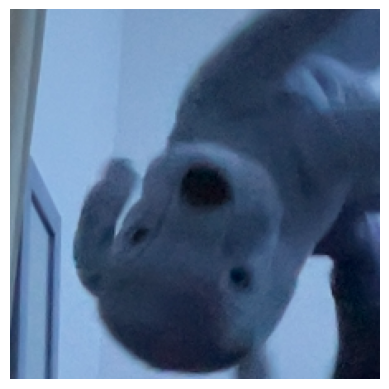

In [15]:
plt.imshow(X_full[0,:,:])
plt.axis('off')

In [16]:
len(X_full[y_full == 4])

104

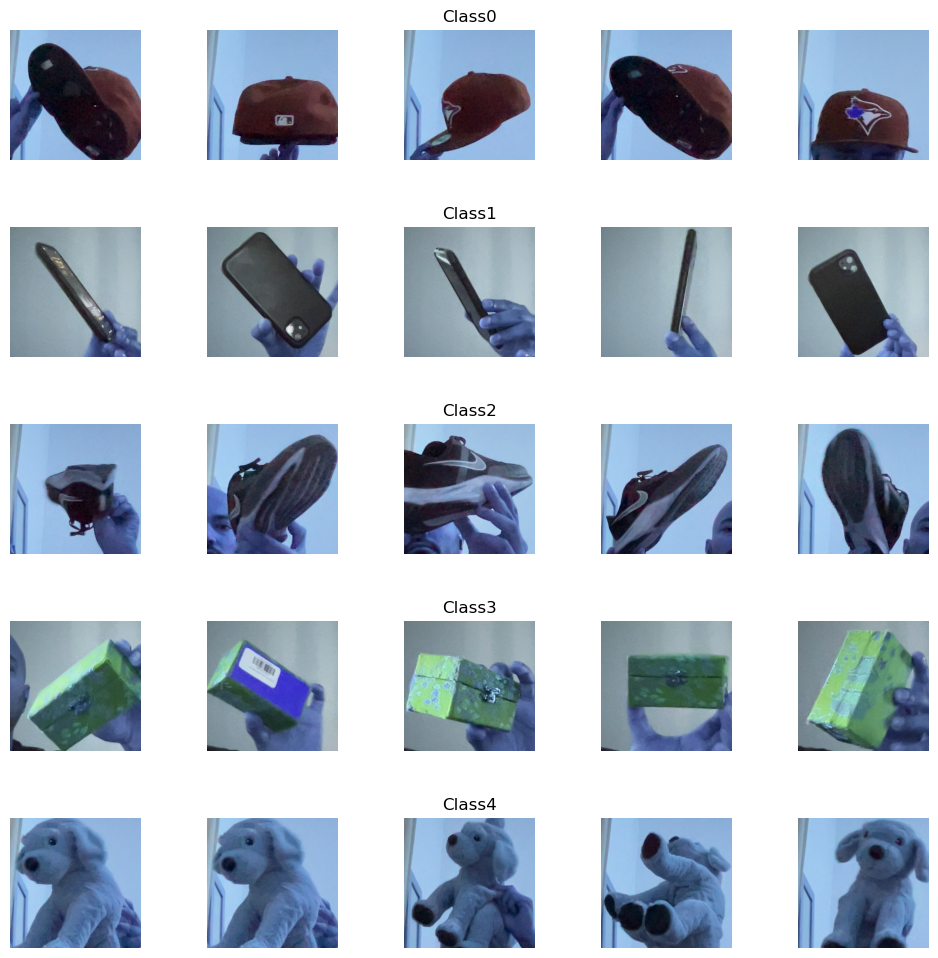

In [17]:
fig, axs = plt.subplots(nrows=rows, ncols = cols, figsize=(10, 10))
fig.tight_layout()
for i in range(cols):
    for j in range(rows):
        X_temp = X_full[y_full == j]
        axs[j][i].imshow(X_temp[random.randint(0, len(X_temp)-1), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title('Class' + str(j))
            num_samples.append(len(X_temp))

Text(0, 0.5, 'Number of images')

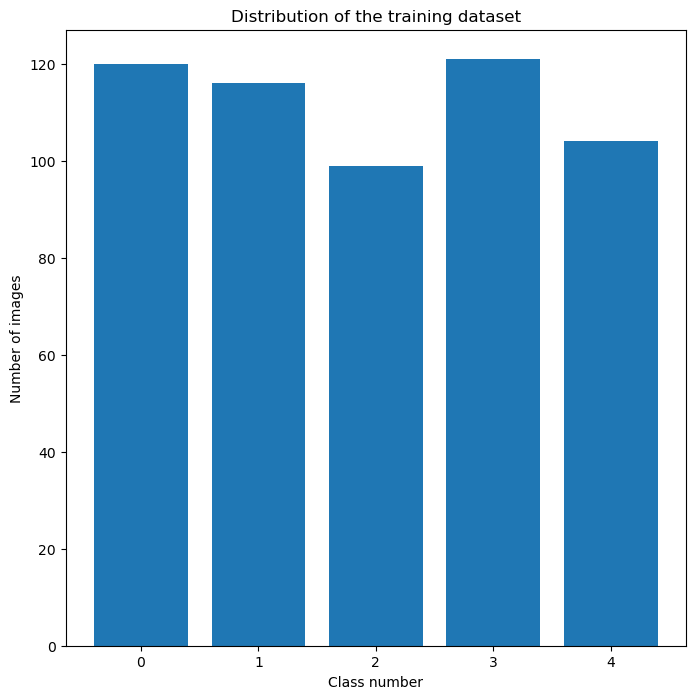

In [18]:
plt.figure(figsize=(8, 8))
plt.bar(range(0, rows), num_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.1, random_state=0)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((504, 224, 224, 3), (56, 224, 224, 3), (504,), (56,))

In [21]:
y_original = y_test.copy()

In [22]:
y_train = to_categorical(y_train, num_classes=rows, dtype='float32')
y_test = to_categorical(y_test, num_classes=rows, dtype='float32')

In [47]:
K.clear_session()

In [48]:
def cnn_model():
  # create model
  model = Sequential()
  model.add(Conv2D(filters=32, kernel_size=2, strides=(2, 2), input_shape=(224, 224, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation='relu'))
  model.add(Conv2D(filters=128, kernel_size=3, strides=(2, 2), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(40, activation='relu'))
  model.add(Dense(rows, activation='softmax'))
  # Compile model
  model.compile(Adam(learning_rate = 0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [49]:
model = cnn_model()

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4608)              0

In [51]:
history=model.fit(X_train, y_train, epochs=15, validation_split = 0.2, batch_size = 60, verbose = 1, shuffle = 1)

Epoch 1/15


2022-11-18 14:09:54.610298: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 90ms/step - loss: 1.6700 - accuracy: 0.2208 - val_loss: 1.6029 - val_accuracy: 0.1584
Epoch 2/15
1/7 [===>..........................] - ETA: 0s - loss: 1.6252 - accuracy: 0.0667

2022-11-18 14:09:55.337207: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 52ms/step - loss: 1.5335 - accuracy: 0.2854 - val_loss: 1.5791 - val_accuracy: 0.3960
Epoch 3/15
7/7 [==============================] - 0s 47ms/step - loss: 1.2499 - accuracy: 0.5509 - val_loss: 0.7862 - val_accuracy: 0.6931
Epoch 4/15
7/7 [==============================] - 0s 47ms/step - loss: 0.5490 - accuracy: 0.7667 - val_loss: 0.3289 - val_accuracy: 0.8812
Epoch 5/15
7/7 [==============================] - 0s 48ms/step - loss: 0.8717 - accuracy: 0.7345 - val_loss: 0.4301 - val_accuracy: 0.8416
Epoch 6/15
7/7 [==============================] - 0s 47ms/step - loss: 0.4604 - accuracy: 0.7891 - val_loss: 0.4776 - val_accuracy: 0.8119
Epoch 7/15
7/7 [==============================] - 0s 46ms/step - loss: 0.4771 - accuracy: 0.7841 - val_loss: 0.3741 - val_accuracy: 0.8713
Epoch 8/15
7/7 [==============================] - 0s 45ms/step - loss: 0.2909 - accuracy: 0.9107 - val_loss: 0.2197 - val_accuracy: 0.9406
Epoch 9/15
7/7 [======================

<AxesSubplot: >

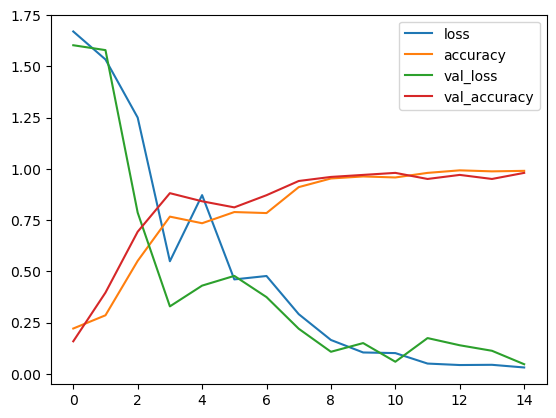

In [52]:
pd.DataFrame(history.history).plot()

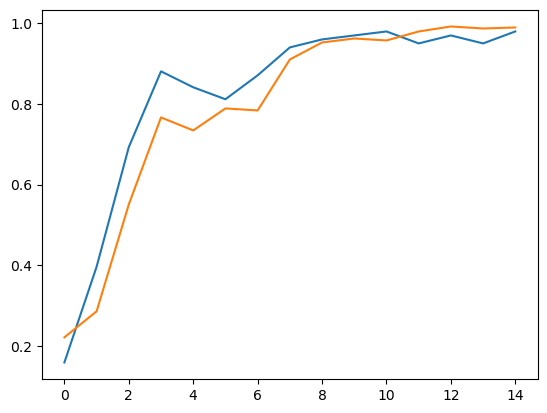

In [53]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])


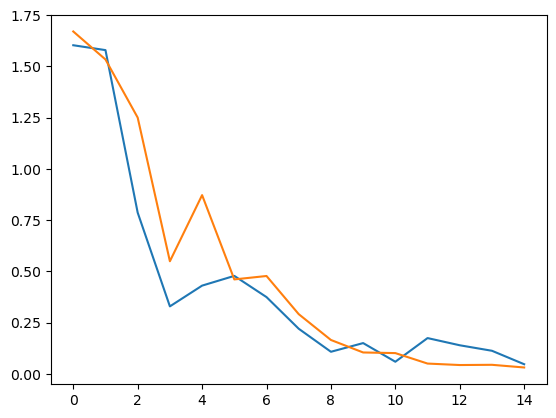

In [54]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

In [55]:
score = model.evaluate(X_test, y_test, verbose=1)

2/2 [==============================] - 0s 32ms/step - loss: 0.0191 - accuracy: 1.0000


In [59]:
#model.save('./pretrained_models/new_model.h5')

In [57]:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 21ms/step


2022-11-18 14:10:17.943592: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


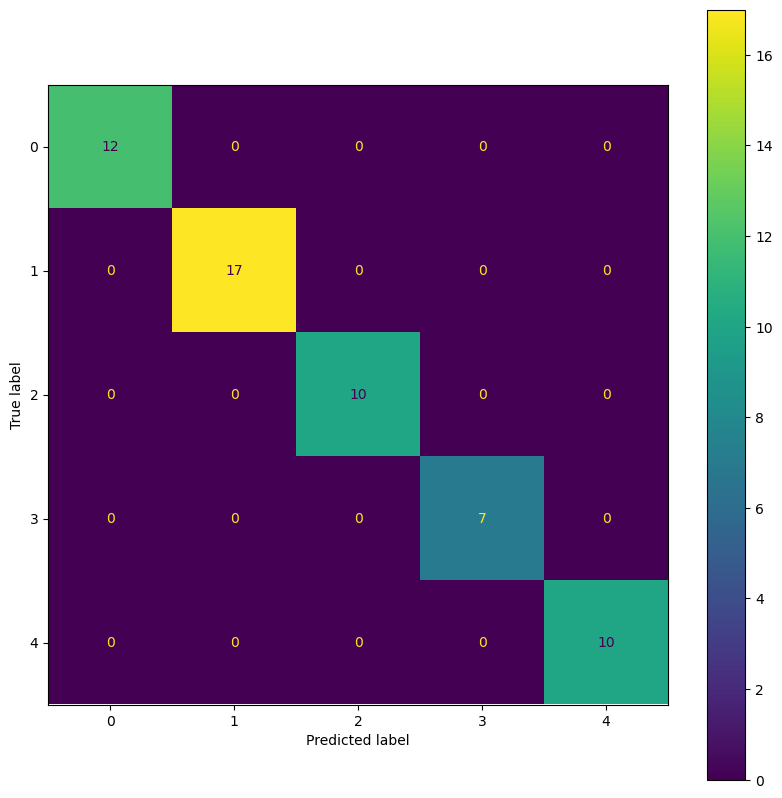

In [58]:
cm = confusion_matrix(y_true=y_original, y_pred=np.argmax(y_pred, axis=1))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=np.unique(y_original))
fig, ax = plt.subplots(figsize=(10,10))

disp.plot(ax=ax)